In [1]:
%matplotlib inline 

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

import model
import model_utils
import preprocessing_utils

In [2]:
torch.manual_seed(1234)

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

epochs = 500
batch_size = 16
lr = 0.0005920310461116504
patience = 10

num_timesteps_input = 8 # 40 minutes
num_timesteps_output = 4 # 20 minutes

In [4]:
raw_trunc_dir = "./data/raw/trunc/"
process_dir = "./data/processed/"

preprocessing_utils.processed(raw_trunc_dir, process_dir, overwrite=False)
A, X, metadata, cat2index, timestamps, means, stds = preprocessing_utils.load(process_dir)

split_line1 = int(X.shape[2] * 0.6)
split_line2 = int(X.shape[2] * 0.8)

train_original_data = X[:, :, :split_line1]
val_original_data = X[:, :, split_line1:split_line2]
test_original_data = X[:, :, split_line2:]

training_input, training_target = preprocessing_utils.generate_dataset(train_original_data,
                                                   num_timesteps_input=num_timesteps_input,
                                                   num_timesteps_output=num_timesteps_output)
val_input, val_target = preprocessing_utils.generate_dataset(val_original_data,
                                         num_timesteps_input=num_timesteps_input,
                                         num_timesteps_output=num_timesteps_output)
test_input, test_target = preprocessing_utils.generate_dataset(test_original_data,
                                           num_timesteps_input=num_timesteps_input,
                                           num_timesteps_output=num_timesteps_output)

# input shape (num_samples ,num_vertices, num_timesteps_window, num_features)
# output shape (num_samples ,num_vertices, num_timesteps_window)
adj_mat = preprocessing_utils.get_normalized_adj(A)
adj_mat = torch.from_numpy(adj_mat).float()

Processing ./data/raw/trunc/Mon_Mar_8_2021/22_10_08.json
Processing ./data/raw/trunc/Mon_Mar_8_2021/22_15_09.json
Processing ./data/raw/trunc/Mon_Mar_8_2021/22_20_10.json
Processing ./data/raw/trunc/Mon_Mar_8_2021/22_25_07.json
Processing ./data/raw/trunc/Mon_Mar_8_2021/22_30_09.json
Processing ./data/raw/trunc/Mon_Mar_8_2021/22_35_20.json
Processing ./data/raw/trunc/Mon_Mar_8_2021/22_40_08.json
Processing ./data/raw/trunc/Mon_Mar_8_2021/22_45_09.json
Processing ./data/raw/trunc/Mon_Mar_8_2021/22_50_08.json
Processing ./data/raw/trunc/Mon_Mar_8_2021/22_55_12.json
Processing ./data/raw/trunc/Mon_Mar_8_2021/23_00_08.json
Processing ./data/raw/trunc/Mon_Mar_8_2021/23_05_09.json
Processing ./data/raw/trunc/Mon_Mar_8_2021/23_10_09.json
Processing ./data/raw/trunc/Mon_Mar_8_2021/23_15_08.json
Processing ./data/raw/trunc/Mon_Mar_8_2021/23_20_10.json
Processing ./data/raw/trunc/Mon_Mar_8_2021/23_25_10.json
Processing ./data/raw/trunc/Mon_Mar_8_2021/23_30_09.json
Processing ./data/raw/trunc/Mon

Processing ./data/raw/trunc/Tue_Mar_9_2021/20_50_10.json
Processing ./data/raw/trunc/Tue_Mar_9_2021/20_55_08.json
Processing ./data/raw/trunc/Tue_Mar_9_2021/21_00_09.json
Processing ./data/raw/trunc/Tue_Mar_9_2021/21_05_10.json
Processing ./data/raw/trunc/Tue_Mar_9_2021/21_10_09.json
Processing ./data/raw/trunc/Tue_Mar_9_2021/21_15_10.json
Processing ./data/raw/trunc/Tue_Mar_9_2021/21_20_19.json
Processing ./data/raw/trunc/Tue_Mar_9_2021/21_25_10.json
Processing ./data/raw/trunc/Tue_Mar_9_2021/21_30_10.json
Processing ./data/raw/trunc/Tue_Mar_9_2021/21_35_10.json
Processing ./data/raw/trunc/Tue_Mar_9_2021/21_40_09.json
Processing ./data/raw/trunc/Tue_Mar_9_2021/21_45_09.json
Processing ./data/raw/trunc/Tue_Mar_9_2021/21_50_11.json
Processing ./data/raw/trunc/Tue_Mar_9_2021/21_55_09.json
Processing ./data/raw/trunc/Tue_Mar_9_2021/22_00_11.json
Processing ./data/raw/trunc/Tue_Mar_9_2021/22_05_10.json
Processing ./data/raw/trunc/Tue_Mar_9_2021/22_10_10.json
Processing ./data/raw/trunc/Tue

Processing ./data/raw/trunc/Wed_Mar_10_2021/17_25_09.json
Processing ./data/raw/trunc/Wed_Mar_10_2021/17_30_09.json
Processing ./data/raw/trunc/Wed_Mar_10_2021/17_35_09.json
Processing ./data/raw/trunc/Wed_Mar_10_2021/17_40_09.json
Processing ./data/raw/trunc/Wed_Mar_10_2021/17_45_09.json
Processing ./data/raw/trunc/Wed_Mar_10_2021/17_50_09.json
Processing ./data/raw/trunc/Wed_Mar_10_2021/17_55_09.json
Processing ./data/raw/trunc/Wed_Mar_10_2021/18_00_19.json
Processing ./data/raw/trunc/Wed_Mar_10_2021/18_05_09.json
Processing ./data/raw/trunc/Wed_Mar_10_2021/18_10_09.json
Processing ./data/raw/trunc/Wed_Mar_10_2021/18_15_12.json
Processing ./data/raw/trunc/Wed_Mar_10_2021/18_20_14.json
Processing ./data/raw/trunc/Wed_Mar_10_2021/18_25_09.json
Processing ./data/raw/trunc/Wed_Mar_10_2021/18_30_09.json
Processing ./data/raw/trunc/Wed_Mar_10_2021/18_35_09.json
Processing ./data/raw/trunc/Wed_Mar_10_2021/18_40_10.json
Processing ./data/raw/trunc/Wed_Mar_10_2021/18_45_08.json
Processing ./d

Processing ./data/raw/trunc/Thu_Mar_11_2021/15_00_09.json
Processing ./data/raw/trunc/Thu_Mar_11_2021/15_05_09.json
Processing ./data/raw/trunc/Thu_Mar_11_2021/15_10_09.json
Processing ./data/raw/trunc/Thu_Mar_11_2021/15_15_09.json
Processing ./data/raw/trunc/Thu_Mar_11_2021/15_20_08.json
Processing ./data/raw/trunc/Thu_Mar_11_2021/15_25_08.json
Processing ./data/raw/trunc/Thu_Mar_11_2021/15_30_10.json
Processing ./data/raw/trunc/Thu_Mar_11_2021/15_35_08.json
Processing ./data/raw/trunc/Thu_Mar_11_2021/15_40_09.json
Processing ./data/raw/trunc/Thu_Mar_11_2021/15_45_09.json
Processing ./data/raw/trunc/Thu_Mar_11_2021/15_50_18.json
Processing ./data/raw/trunc/Thu_Mar_11_2021/15_55_09.json
Processing ./data/raw/trunc/Thu_Mar_11_2021/16_00_09.json
Processing ./data/raw/trunc/Thu_Mar_11_2021/16_05_10.json
Processing ./data/raw/trunc/Thu_Mar_11_2021/16_10_09.json
Processing ./data/raw/trunc/Thu_Mar_11_2021/16_15_09.json
Processing ./data/raw/trunc/Thu_Mar_11_2021/16_20_09.json
Processing ./d

Processing ./data/raw/trunc/Fri_Mar_12_2021/14_40_09.json
Processing ./data/raw/trunc/Fri_Mar_12_2021/14_45_09.json
Processing ./data/raw/trunc/Fri_Mar_12_2021/14_50_15.json
Processing ./data/raw/trunc/Fri_Mar_12_2021/14_55_08.json
Processing ./data/raw/trunc/Fri_Mar_12_2021/15_00_10.json
Processing ./data/raw/trunc/Fri_Mar_12_2021/15_05_10.json
Processing ./data/raw/trunc/Fri_Mar_12_2021/15_10_22.json
Processing ./data/raw/trunc/Fri_Mar_12_2021/15_15_09.json
Processing ./data/raw/trunc/Fri_Mar_12_2021/15_20_10.json
Processing ./data/raw/trunc/Fri_Mar_12_2021/15_25_10.json
Processing ./data/raw/trunc/Fri_Mar_12_2021/15_30_10.json
Processing ./data/raw/trunc/Fri_Mar_12_2021/15_35_10.json
Processing ./data/raw/trunc/Fri_Mar_12_2021/15_40_10.json
Processing ./data/raw/trunc/Fri_Mar_12_2021/15_45_08.json
Processing ./data/raw/trunc/Fri_Mar_12_2021/15_50_10.json
Processing ./data/raw/trunc/Fri_Mar_12_2021/15_55_09.json
Processing ./data/raw/trunc/Fri_Mar_12_2021/16_00_09.json
Processing ./d

Processing ./data/raw/trunc/Sat_Mar_13_2021/15_00_09.json
Processing ./data/raw/trunc/Sat_Mar_13_2021/15_05_09.json
Processing ./data/raw/trunc/Sat_Mar_13_2021/15_10_09.json
Processing ./data/raw/trunc/Sat_Mar_13_2021/15_15_09.json
Processing ./data/raw/trunc/Sat_Mar_13_2021/15_20_09.json
Processing ./data/raw/trunc/Sat_Mar_13_2021/15_25_21.json
Processing ./data/raw/trunc/Sat_Mar_13_2021/15_30_09.json
Processing ./data/raw/trunc/Sat_Mar_13_2021/15_35_09.json
Processing ./data/raw/trunc/Sat_Mar_13_2021/15_40_09.json
Processing ./data/raw/trunc/Sat_Mar_13_2021/15_45_19.json
Processing ./data/raw/trunc/Sat_Mar_13_2021/15_50_10.json
Processing ./data/raw/trunc/Sat_Mar_13_2021/15_55_09.json
Processing ./data/raw/trunc/Sat_Mar_13_2021/16_00_09.json
Processing ./data/raw/trunc/Sat_Mar_13_2021/16_05_09.json
Processing ./data/raw/trunc/Sat_Mar_13_2021/16_10_09.json
Processing ./data/raw/trunc/Sat_Mar_13_2021/16_15_10.json
Processing ./data/raw/trunc/Sat_Mar_13_2021/16_20_09.json
Processing ./d

Processing ./data/raw/trunc/Sun_Mar_14_2021/14_20_09.json
Processing ./data/raw/trunc/Sun_Mar_14_2021/14_25_08.json
Processing ./data/raw/trunc/Sun_Mar_14_2021/14_30_09.json
Processing ./data/raw/trunc/Sun_Mar_14_2021/14_35_10.json
Processing ./data/raw/trunc/Sun_Mar_14_2021/14_40_21.json
Processing ./data/raw/trunc/Sun_Mar_14_2021/14_45_09.json
Processing ./data/raw/trunc/Sun_Mar_14_2021/14_50_10.json
Processing ./data/raw/trunc/Sun_Mar_14_2021/14_55_09.json
Processing ./data/raw/trunc/Sun_Mar_14_2021/15_00_10.json
Processing ./data/raw/trunc/Sun_Mar_14_2021/15_05_08.json
Processing ./data/raw/trunc/Sun_Mar_14_2021/15_10_09.json
Processing ./data/raw/trunc/Sun_Mar_14_2021/15_15_09.json
Processing ./data/raw/trunc/Sun_Mar_14_2021/15_20_09.json
Processing ./data/raw/trunc/Sun_Mar_14_2021/15_25_08.json
Processing ./data/raw/trunc/Sun_Mar_14_2021/15_30_09.json
Processing ./data/raw/trunc/Sun_Mar_14_2021/15_35_09.json
Processing ./data/raw/trunc/Sun_Mar_14_2021/15_40_09.json
Processing ./d

Processing ./data/raw/trunc/Mon_Mar_15_2021/11_30_08.json
Processing ./data/raw/trunc/Mon_Mar_15_2021/11_35_08.json
Processing ./data/raw/trunc/Mon_Mar_15_2021/11_40_09.json
Processing ./data/raw/trunc/Mon_Mar_15_2021/11_45_09.json
Processing ./data/raw/trunc/Mon_Mar_15_2021/11_50_08.json
Processing ./data/raw/trunc/Mon_Mar_15_2021/11_55_09.json
Processing ./data/raw/trunc/Mon_Mar_15_2021/12_00_08.json
Processing ./data/raw/trunc/Mon_Mar_15_2021/12_05_09.json
Processing ./data/raw/trunc/Mon_Mar_15_2021/12_10_09.json
Processing ./data/raw/trunc/Mon_Mar_15_2021/12_15_08.json
Processing ./data/raw/trunc/Mon_Mar_15_2021/12_20_08.json
Processing ./data/raw/trunc/Mon_Mar_15_2021/12_25_24.json
Processing ./data/raw/trunc/Mon_Mar_15_2021/12_30_09.json
Processing ./data/raw/trunc/Mon_Mar_15_2021/12_35_09.json
Processing ./data/raw/trunc/Mon_Mar_15_2021/12_40_08.json
Processing ./data/raw/trunc/Mon_Mar_15_2021/12_45_09.json
Processing ./data/raw/trunc/Mon_Mar_15_2021/12_50_09.json
Processing ./d

Processing ./data/raw/trunc/Tue_Mar_16_2021/09_15_09.json
Processing ./data/raw/trunc/Tue_Mar_16_2021/09_20_11.json
Processing ./data/raw/trunc/Tue_Mar_16_2021/09_25_09.json
Processing ./data/raw/trunc/Tue_Mar_16_2021/09_30_09.json
Processing ./data/raw/trunc/Tue_Mar_16_2021/09_35_08.json
Processing ./data/raw/trunc/Tue_Mar_16_2021/09_40_09.json
Processing ./data/raw/trunc/Tue_Mar_16_2021/09_45_08.json
Processing ./data/raw/trunc/Tue_Mar_16_2021/09_50_10.json
Processing ./data/raw/trunc/Tue_Mar_16_2021/09_55_10.json
Processing ./data/raw/trunc/Tue_Mar_16_2021/10_00_10.json
Processing ./data/raw/trunc/Tue_Mar_16_2021/10_05_19.json
Processing ./data/raw/trunc/Tue_Mar_16_2021/10_10_09.json
Processing ./data/raw/trunc/Tue_Mar_16_2021/10_15_10.json
Processing ./data/raw/trunc/Tue_Mar_16_2021/10_20_09.json
Processing ./data/raw/trunc/Tue_Mar_16_2021/10_25_09.json
Processing ./data/raw/trunc/Tue_Mar_16_2021/10_30_09.json
Processing ./data/raw/trunc/Tue_Mar_16_2021/10_35_09.json
Processing ./d

Processing ./data/raw/trunc/Wed_Mar_17_2021/06_30_09.json
Processing ./data/raw/trunc/Wed_Mar_17_2021/06_35_08.json
Processing ./data/raw/trunc/Wed_Mar_17_2021/06_40_09.json
Processing ./data/raw/trunc/Wed_Mar_17_2021/06_45_09.json
Processing ./data/raw/trunc/Wed_Mar_17_2021/06_50_09.json
Processing ./data/raw/trunc/Wed_Mar_17_2021/06_55_21.json
Processing ./data/raw/trunc/Wed_Mar_17_2021/07_00_09.json
Processing ./data/raw/trunc/Wed_Mar_17_2021/07_05_09.json
Processing ./data/raw/trunc/Wed_Mar_17_2021/07_10_08.json
Processing ./data/raw/trunc/Wed_Mar_17_2021/07_15_09.json
Processing ./data/raw/trunc/Wed_Mar_17_2021/07_20_08.json
Processing ./data/raw/trunc/Wed_Mar_17_2021/07_25_10.json
Processing ./data/raw/trunc/Wed_Mar_17_2021/07_30_09.json
Processing ./data/raw/trunc/Wed_Mar_17_2021/07_35_08.json
Processing ./data/raw/trunc/Wed_Mar_17_2021/07_40_09.json
Processing ./data/raw/trunc/Wed_Mar_17_2021/07_45_09.json
Processing ./data/raw/trunc/Wed_Mar_17_2021/07_50_09.json
Processing ./d

Processing ./data/raw/trunc/Thu_Mar_18_2021/06_05_08.json
Processing ./data/raw/trunc/Thu_Mar_18_2021/06_10_08.json
Processing ./data/raw/trunc/Thu_Mar_18_2021/06_15_08.json
Processing ./data/raw/trunc/Thu_Mar_18_2021/06_20_08.json
Processing ./data/raw/trunc/Thu_Mar_18_2021/06_25_08.json
Processing ./data/raw/trunc/Thu_Mar_18_2021/06_30_10.json
Processing ./data/raw/trunc/Thu_Mar_18_2021/06_35_08.json
Processing ./data/raw/trunc/Thu_Mar_18_2021/06_40_08.json
Processing ./data/raw/trunc/Thu_Mar_18_2021/06_45_08.json
Processing ./data/raw/trunc/Thu_Mar_18_2021/06_50_08.json
Processing ./data/raw/trunc/Thu_Mar_18_2021/06_55_09.json
Processing ./data/raw/trunc/Thu_Mar_18_2021/07_00_08.json
Processing ./data/raw/trunc/Thu_Mar_18_2021/07_05_09.json
Processing ./data/raw/trunc/Thu_Mar_18_2021/07_10_16.json
Processing ./data/raw/trunc/Thu_Mar_18_2021/07_15_08.json
Processing ./data/raw/trunc/Thu_Mar_18_2021/07_20_09.json
Processing ./data/raw/trunc/Thu_Mar_18_2021/07_25_08.json
Processing ./d

Processing ./data/raw/trunc/Fri_Mar_19_2021/06_05_15.json
Processing ./data/raw/trunc/Fri_Mar_19_2021/06_10_09.json
Processing ./data/raw/trunc/Fri_Mar_19_2021/06_15_08.json
Processing ./data/raw/trunc/Fri_Mar_19_2021/06_20_17.json
Processing ./data/raw/trunc/Fri_Mar_19_2021/06_25_09.json
Processing ./data/raw/trunc/Fri_Mar_19_2021/06_30_09.json
Processing ./data/raw/trunc/Fri_Mar_19_2021/06_35_09.json
Processing ./data/raw/trunc/Fri_Mar_19_2021/06_40_10.json
Processing ./data/raw/trunc/Fri_Mar_19_2021/06_45_09.json
Processing ./data/raw/trunc/Fri_Mar_19_2021/06_50_08.json
Processing ./data/raw/trunc/Fri_Mar_19_2021/06_55_08.json
Processing ./data/raw/trunc/Fri_Mar_19_2021/07_00_09.json
Processing ./data/raw/trunc/Fri_Mar_19_2021/07_05_09.json
Processing ./data/raw/trunc/Fri_Mar_19_2021/07_10_16.json
Processing ./data/raw/trunc/Fri_Mar_19_2021/07_15_09.json
Processing ./data/raw/trunc/Fri_Mar_19_2021/07_20_09.json
Processing ./data/raw/trunc/Fri_Mar_19_2021/07_25_16.json
Processing ./d

Processing ./data/raw/trunc/Sat_Mar_20_2021/04_20_09.json
Processing ./data/raw/trunc/Sat_Mar_20_2021/04_25_09.json
Processing ./data/raw/trunc/Sat_Mar_20_2021/04_30_08.json
Processing ./data/raw/trunc/Sat_Mar_20_2021/04_35_14.json
Processing ./data/raw/trunc/Sat_Mar_20_2021/04_40_08.json
Processing ./data/raw/trunc/Sat_Mar_20_2021/04_45_08.json
Processing ./data/raw/trunc/Sat_Mar_20_2021/04_50_09.json
Processing ./data/raw/trunc/Sat_Mar_20_2021/04_55_08.json
Processing ./data/raw/trunc/Sat_Mar_20_2021/05_00_09.json
Processing ./data/raw/trunc/Sat_Mar_20_2021/05_05_13.json
Processing ./data/raw/trunc/Sat_Mar_20_2021/05_10_08.json
Processing ./data/raw/trunc/Sat_Mar_20_2021/05_15_09.json
Processing ./data/raw/trunc/Sat_Mar_20_2021/05_20_09.json
Processing ./data/raw/trunc/Sat_Mar_20_2021/05_25_11.json
Processing ./data/raw/trunc/Sat_Mar_20_2021/05_30_09.json
Processing ./data/raw/trunc/Sat_Mar_20_2021/05_35_08.json
Processing ./data/raw/trunc/Sat_Mar_20_2021/05_40_14.json
Processing ./d

Processing ./data/raw/trunc/Sun_Mar_21_2021/03_00_09.json
Processing ./data/raw/trunc/Sun_Mar_21_2021/03_05_14.json
Processing ./data/raw/trunc/Sun_Mar_21_2021/03_10_09.json
Processing ./data/raw/trunc/Sun_Mar_21_2021/03_15_10.json
Processing ./data/raw/trunc/Sun_Mar_21_2021/03_20_09.json
Processing ./data/raw/trunc/Sun_Mar_21_2021/03_25_11.json
Processing ./data/raw/trunc/Sun_Mar_21_2021/03_30_09.json
Processing ./data/raw/trunc/Sun_Mar_21_2021/03_35_09.json
Processing ./data/raw/trunc/Sun_Mar_21_2021/03_40_09.json
Processing ./data/raw/trunc/Sun_Mar_21_2021/03_45_08.json
Processing ./data/raw/trunc/Sun_Mar_21_2021/03_50_09.json
Processing ./data/raw/trunc/Sun_Mar_21_2021/03_55_08.json
Processing ./data/raw/trunc/Sun_Mar_21_2021/04_00_10.json
Processing ./data/raw/trunc/Sun_Mar_21_2021/04_05_09.json
Processing ./data/raw/trunc/Sun_Mar_21_2021/04_10_08.json
Processing ./data/raw/trunc/Sun_Mar_21_2021/04_15_11.json
Processing ./data/raw/trunc/Sun_Mar_21_2021/04_20_09.json
Processing ./d

Processing ./data/raw/trunc/Mon_Mar_22_2021/00_15_12.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/00_20_10.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/00_25_10.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/00_30_11.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/00_35_10.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/00_40_09.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/00_45_08.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/00_50_13.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/00_55_08.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/01_00_09.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/01_05_10.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/01_10_09.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/01_15_08.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/01_20_12.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/01_25_09.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/01_30_08.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/01_35_09.json
Processing ./d

Processing ./data/raw/trunc/Mon_Mar_22_2021/22_40_09.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/22_45_09.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/22_50_10.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/22_55_12.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/23_00_08.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/23_05_08.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/23_10_17.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/23_15_09.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/23_20_10.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/23_25_08.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/23_30_12.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/23_35_09.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/23_40_08.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/23_45_09.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/23_50_09.json
Processing ./data/raw/trunc/Mon_Mar_22_2021/23_55_09.json
Processing ./data/raw/trunc/Tue_Mar_23_2021/00_00_11.json
Processing ./d

Processing ./data/raw/trunc/Tue_Mar_23_2021/21_30_09.json
Processing ./data/raw/trunc/Tue_Mar_23_2021/21_35_10.json
Processing ./data/raw/trunc/Tue_Mar_23_2021/21_40_09.json
Processing ./data/raw/trunc/Tue_Mar_23_2021/21_45_09.json
Processing ./data/raw/trunc/Tue_Mar_23_2021/21_50_09.json
Processing ./data/raw/trunc/Tue_Mar_23_2021/21_55_16.json
Processing ./data/raw/trunc/Tue_Mar_23_2021/22_00_09.json
Processing ./data/raw/trunc/Tue_Mar_23_2021/22_05_09.json
Processing ./data/raw/trunc/Tue_Mar_23_2021/22_10_10.json
Processing ./data/raw/trunc/Tue_Mar_23_2021/22_15_09.json
Processing ./data/raw/trunc/Tue_Mar_23_2021/22_20_09.json
Processing ./data/raw/trunc/Tue_Mar_23_2021/22_25_14.json
Processing ./data/raw/trunc/Tue_Mar_23_2021/22_30_09.json
Processing ./data/raw/trunc/Tue_Mar_23_2021/22_35_09.json
Processing ./data/raw/trunc/Tue_Mar_23_2021/22_40_10.json
Processing ./data/raw/trunc/Tue_Mar_23_2021/22_45_09.json
Processing ./data/raw/trunc/Tue_Mar_23_2021/22_50_08.json
Processing ./d

Processing ./data/raw/trunc/Wed_Mar_24_2021/21_20_08.json
Processing ./data/raw/trunc/Wed_Mar_24_2021/21_25_11.json
Processing ./data/raw/trunc/Wed_Mar_24_2021/21_30_08.json
Processing ./data/raw/trunc/Wed_Mar_24_2021/21_35_08.json
Processing ./data/raw/trunc/Wed_Mar_24_2021/21_40_11.json
Processing ./data/raw/trunc/Wed_Mar_24_2021/21_45_08.json
Processing ./data/raw/trunc/Wed_Mar_24_2021/21_50_09.json
Processing ./data/raw/trunc/Wed_Mar_24_2021/21_55_09.json
Processing ./data/raw/trunc/Wed_Mar_24_2021/22_00_17.json
Processing ./data/raw/trunc/Wed_Mar_24_2021/22_05_08.json
Processing ./data/raw/trunc/Wed_Mar_24_2021/22_10_09.json
Processing ./data/raw/trunc/Wed_Mar_24_2021/22_15_09.json
Processing ./data/raw/trunc/Wed_Mar_24_2021/22_20_09.json
Processing ./data/raw/trunc/Wed_Mar_24_2021/22_25_08.json
Processing ./data/raw/trunc/Wed_Mar_24_2021/22_30_09.json
Processing ./data/raw/trunc/Wed_Mar_24_2021/22_35_08.json
Processing ./data/raw/trunc/Wed_Mar_24_2021/22_40_09.json
Processing ./d

Processing ./data/raw/trunc/Thu_Mar_25_2021/20_15_08.json
Processing ./data/raw/trunc/Thu_Mar_25_2021/20_20_09.json
Processing ./data/raw/trunc/Thu_Mar_25_2021/20_25_17.json
Processing ./data/raw/trunc/Thu_Mar_25_2021/20_30_09.json
Processing ./data/raw/trunc/Thu_Mar_25_2021/20_35_09.json
Processing ./data/raw/trunc/Thu_Mar_25_2021/20_40_12.json
Processing ./data/raw/trunc/Thu_Mar_25_2021/20_45_09.json
Processing ./data/raw/trunc/Thu_Mar_25_2021/20_50_08.json
Processing ./data/raw/trunc/Thu_Mar_25_2021/20_55_10.json
Processing ./data/raw/trunc/Thu_Mar_25_2021/21_00_09.json
Processing ./data/raw/trunc/Thu_Mar_25_2021/21_05_09.json
Processing ./data/raw/trunc/Thu_Mar_25_2021/21_10_19.json
Processing ./data/raw/trunc/Thu_Mar_25_2021/21_15_09.json
Processing ./data/raw/trunc/Thu_Mar_25_2021/21_20_09.json
Processing ./data/raw/trunc/Thu_Mar_25_2021/21_25_09.json
Processing ./data/raw/trunc/Thu_Mar_25_2021/21_30_09.json
Processing ./data/raw/trunc/Thu_Mar_25_2021/21_35_09.json
Processing ./d

Processing ./data/raw/trunc/Fri_Mar_26_2021/16_20_11.json
Processing ./data/raw/trunc/Fri_Mar_26_2021/16_25_09.json
Processing ./data/raw/trunc/Fri_Mar_26_2021/16_30_09.json
Processing ./data/raw/trunc/Fri_Mar_26_2021/16_35_09.json
Processing ./data/raw/trunc/Fri_Mar_26_2021/16_40_09.json
Processing ./data/raw/trunc/Fri_Mar_26_2021/16_45_15.json
Processing ./data/raw/trunc/Fri_Mar_26_2021/16_50_09.json
Processing ./data/raw/trunc/Fri_Mar_26_2021/16_55_08.json
Processing ./data/raw/trunc/Fri_Mar_26_2021/17_00_11.json
Processing ./data/raw/trunc/Fri_Mar_26_2021/17_05_09.json
Processing ./data/raw/trunc/Fri_Mar_26_2021/17_10_11.json
Processing ./data/raw/trunc/Fri_Mar_26_2021/17_15_09.json
Processing ./data/raw/trunc/Fri_Mar_26_2021/17_20_09.json
Processing ./data/raw/trunc/Fri_Mar_26_2021/17_25_08.json
Processing ./data/raw/trunc/Fri_Mar_26_2021/17_30_10.json
Processing ./data/raw/trunc/Fri_Mar_26_2021/17_35_09.json
Processing ./data/raw/trunc/Fri_Mar_26_2021/17_40_09.json
Processing ./d

Processing ./data/raw/trunc/Sat_Mar_27_2021/15_45_08.json
Processing ./data/raw/trunc/Sat_Mar_27_2021/15_50_09.json
Processing ./data/raw/trunc/Sat_Mar_27_2021/15_55_09.json
Processing ./data/raw/trunc/Sat_Mar_27_2021/16_00_23.json
Processing ./data/raw/trunc/Sat_Mar_27_2021/16_05_09.json
Processing ./data/raw/trunc/Sat_Mar_27_2021/16_10_10.json
Processing ./data/raw/trunc/Sat_Mar_27_2021/16_15_10.json
Processing ./data/raw/trunc/Sat_Mar_27_2021/16_20_22.json
Processing ./data/raw/trunc/Sat_Mar_27_2021/16_25_08.json
Processing ./data/raw/trunc/Sat_Mar_27_2021/16_30_08.json
Processing ./data/raw/trunc/Sat_Mar_27_2021/16_35_10.json
Processing ./data/raw/trunc/Sat_Mar_27_2021/16_40_08.json
Processing ./data/raw/trunc/Sat_Mar_27_2021/16_45_09.json
Processing ./data/raw/trunc/Sat_Mar_27_2021/16_50_12.json
Processing ./data/raw/trunc/Sat_Mar_27_2021/16_55_08.json
Processing ./data/raw/trunc/Sat_Mar_27_2021/17_00_10.json
Processing ./data/raw/trunc/Sat_Mar_27_2021/17_05_10.json
Processing ./d

Processing ./data/raw/trunc/Sun_Mar_28_2021/15_40_09.json
Processing ./data/raw/trunc/Sun_Mar_28_2021/15_45_19.json
Processing ./data/raw/trunc/Sun_Mar_28_2021/15_50_09.json
Processing ./data/raw/trunc/Sun_Mar_28_2021/15_55_09.json
Processing ./data/raw/trunc/Sun_Mar_28_2021/16_00_09.json
Processing ./data/raw/trunc/Sun_Mar_28_2021/16_05_15.json
Processing ./data/raw/trunc/Sun_Mar_28_2021/16_10_08.json
Processing ./data/raw/trunc/Sun_Mar_28_2021/16_15_10.json
Processing ./data/raw/trunc/Sun_Mar_28_2021/16_20_10.json
Processing ./data/raw/trunc/Sun_Mar_28_2021/16_25_09.json
Processing ./data/raw/trunc/Sun_Mar_28_2021/16_30_12.json
Processing ./data/raw/trunc/Sun_Mar_28_2021/16_35_09.json
Processing ./data/raw/trunc/Sun_Mar_28_2021/16_40_09.json
Processing ./data/raw/trunc/Sun_Mar_28_2021/16_45_08.json
Processing ./data/raw/trunc/Sun_Mar_28_2021/16_50_10.json
Processing ./data/raw/trunc/Sun_Mar_28_2021/16_55_08.json
Processing ./data/raw/trunc/Sun_Mar_28_2021/17_00_09.json
Processing ./d

Processing ./data/raw/trunc/Mon_Mar_29_2021/15_00_09.json
Processing ./data/raw/trunc/Mon_Mar_29_2021/15_05_09.json
Processing ./data/raw/trunc/Mon_Mar_29_2021/15_10_09.json
Processing ./data/raw/trunc/Mon_Mar_29_2021/15_15_19.json
Processing ./data/raw/trunc/Mon_Mar_29_2021/15_20_10.json
Processing ./data/raw/trunc/Mon_Mar_29_2021/15_25_08.json
Processing ./data/raw/trunc/Mon_Mar_29_2021/15_30_10.json
Processing ./data/raw/trunc/Mon_Mar_29_2021/15_35_08.json
Processing ./data/raw/trunc/Mon_Mar_29_2021/15_40_08.json
Processing ./data/raw/trunc/Mon_Mar_29_2021/15_45_09.json
Processing ./data/raw/trunc/Mon_Mar_29_2021/15_50_08.json
Processing ./data/raw/trunc/Mon_Mar_29_2021/15_55_09.json
Processing ./data/raw/trunc/Mon_Mar_29_2021/16_00_08.json
Processing ./data/raw/trunc/Mon_Mar_29_2021/16_05_09.json
Processing ./data/raw/trunc/Mon_Mar_29_2021/16_10_08.json
Processing ./data/raw/trunc/Mon_Mar_29_2021/16_15_09.json
Processing ./data/raw/trunc/Mon_Mar_29_2021/16_20_20.json
Processing ./d

Processing ./data/raw/trunc/Tue_Mar_30_2021/13_25_10.json
Processing ./data/raw/trunc/Tue_Mar_30_2021/13_30_09.json
Processing ./data/raw/trunc/Tue_Mar_30_2021/13_35_08.json
Processing ./data/raw/trunc/Tue_Mar_30_2021/13_40_10.json
Processing ./data/raw/trunc/Tue_Mar_30_2021/13_45_09.json
Processing ./data/raw/trunc/Tue_Mar_30_2021/13_50_08.json
Processing ./data/raw/trunc/Tue_Mar_30_2021/13_55_17.json
Processing ./data/raw/trunc/Tue_Mar_30_2021/14_00_08.json
Processing ./data/raw/trunc/Tue_Mar_30_2021/14_05_10.json
Processing ./data/raw/trunc/Tue_Mar_30_2021/14_10_09.json
Processing ./data/raw/trunc/Tue_Mar_30_2021/14_15_09.json
Processing ./data/raw/trunc/Tue_Mar_30_2021/14_20_08.json
Processing ./data/raw/trunc/Tue_Mar_30_2021/14_25_08.json
Processing ./data/raw/trunc/Tue_Mar_30_2021/14_30_10.json
Processing ./data/raw/trunc/Tue_Mar_30_2021/14_35_08.json
Processing ./data/raw/trunc/Tue_Mar_30_2021/14_40_10.json
Processing ./data/raw/trunc/Tue_Mar_30_2021/14_45_09.json
Processing ./d

Processing ./data/raw/trunc/Wed_Mar_31_2021/11_20_09.json
Processing ./data/raw/trunc/Wed_Mar_31_2021/11_25_08.json
Processing ./data/raw/trunc/Wed_Mar_31_2021/11_30_08.json
Processing ./data/raw/trunc/Wed_Mar_31_2021/11_35_13.json
Processing ./data/raw/trunc/Wed_Mar_31_2021/11_40_09.json
Processing ./data/raw/trunc/Wed_Mar_31_2021/11_45_08.json
Processing ./data/raw/trunc/Wed_Mar_31_2021/11_50_08.json
Processing ./data/raw/trunc/Wed_Mar_31_2021/11_55_18.json
Processing ./data/raw/trunc/Wed_Mar_31_2021/12_00_09.json
Processing ./data/raw/trunc/Wed_Mar_31_2021/12_05_09.json
Processing ./data/raw/trunc/Wed_Mar_31_2021/12_10_09.json
Processing ./data/raw/trunc/Wed_Mar_31_2021/12_15_08.json
Processing ./data/raw/trunc/Wed_Mar_31_2021/12_20_08.json
Processing ./data/raw/trunc/Wed_Mar_31_2021/12_25_09.json
Processing ./data/raw/trunc/Wed_Mar_31_2021/12_30_09.json
Processing ./data/raw/trunc/Wed_Mar_31_2021/12_35_07.json
Processing ./data/raw/trunc/Wed_Mar_31_2021/12_40_19.json
Processing ./d

Processing ./data/raw/trunc/Thu_Apr_1_2021/11_25_10.json
Processing ./data/raw/trunc/Thu_Apr_1_2021/11_30_09.json
Processing ./data/raw/trunc/Thu_Apr_1_2021/11_35_09.json
Processing ./data/raw/trunc/Thu_Apr_1_2021/11_40_08.json
Processing ./data/raw/trunc/Thu_Apr_1_2021/11_45_09.json
Processing ./data/raw/trunc/Thu_Apr_1_2021/11_50_08.json
Processing ./data/raw/trunc/Thu_Apr_1_2021/11_55_09.json
Processing ./data/raw/trunc/Thu_Apr_1_2021/12_00_09.json
Processing ./data/raw/trunc/Thu_Apr_1_2021/12_05_08.json
Processing ./data/raw/trunc/Thu_Apr_1_2021/12_10_09.json
Processing ./data/raw/trunc/Thu_Apr_1_2021/12_15_19.json
Processing ./data/raw/trunc/Thu_Apr_1_2021/12_20_08.json
Processing ./data/raw/trunc/Thu_Apr_1_2021/12_25_09.json
Processing ./data/raw/trunc/Thu_Apr_1_2021/12_30_09.json
Processing ./data/raw/trunc/Thu_Apr_1_2021/12_35_08.json
Processing ./data/raw/trunc/Thu_Apr_1_2021/12_40_09.json
Processing ./data/raw/trunc/Thu_Apr_1_2021/12_45_09.json
Processing ./data/raw/trunc/Thu

Processing ./data/raw/trunc/Fri_Apr_2_2021/11_05_08.json
Processing ./data/raw/trunc/Fri_Apr_2_2021/11_10_09.json
Processing ./data/raw/trunc/Fri_Apr_2_2021/11_15_09.json
Processing ./data/raw/trunc/Fri_Apr_2_2021/11_20_08.json
Processing ./data/raw/trunc/Fri_Apr_2_2021/11_25_09.json
Processing ./data/raw/trunc/Fri_Apr_2_2021/11_30_09.json
Processing ./data/raw/trunc/Fri_Apr_2_2021/11_35_08.json
Processing ./data/raw/trunc/Fri_Apr_2_2021/11_40_21.json
Processing ./data/raw/trunc/Fri_Apr_2_2021/11_45_08.json
Processing ./data/raw/trunc/Fri_Apr_2_2021/11_50_09.json
Processing ./data/raw/trunc/Fri_Apr_2_2021/11_55_09.json
Processing ./data/raw/trunc/Fri_Apr_2_2021/12_00_14.json
Processing ./data/raw/trunc/Fri_Apr_2_2021/12_05_09.json
Processing ./data/raw/trunc/Fri_Apr_2_2021/12_10_09.json
Processing ./data/raw/trunc/Fri_Apr_2_2021/12_15_11.json
Processing ./data/raw/trunc/Fri_Apr_2_2021/12_20_08.json
Processing ./data/raw/trunc/Fri_Apr_2_2021/12_25_09.json
Processing ./data/raw/trunc/Fri

Processing ./data/raw/trunc/Sat_Apr_3_2021/10_10_10.json
Processing ./data/raw/trunc/Sat_Apr_3_2021/10_15_09.json
Processing ./data/raw/trunc/Sat_Apr_3_2021/10_20_09.json
Processing ./data/raw/trunc/Sat_Apr_3_2021/10_25_19.json
Processing ./data/raw/trunc/Sat_Apr_3_2021/10_30_09.json
Processing ./data/raw/trunc/Sat_Apr_3_2021/10_35_09.json
Processing ./data/raw/trunc/Sat_Apr_3_2021/10_40_10.json
Processing ./data/raw/trunc/Sat_Apr_3_2021/10_45_09.json
Processing ./data/raw/trunc/Sat_Apr_3_2021/10_50_08.json
Processing ./data/raw/trunc/Sat_Apr_3_2021/10_55_10.json
Processing ./data/raw/trunc/Sat_Apr_3_2021/11_00_09.json
Processing ./data/raw/trunc/Sat_Apr_3_2021/11_05_09.json
Processing ./data/raw/trunc/Sat_Apr_3_2021/11_10_08.json
Processing ./data/raw/trunc/Sat_Apr_3_2021/11_15_09.json
Processing ./data/raw/trunc/Sat_Apr_3_2021/11_20_09.json
Processing ./data/raw/trunc/Sat_Apr_3_2021/11_25_08.json
Processing ./data/raw/trunc/Sat_Apr_3_2021/11_30_19.json
Processing ./data/raw/trunc/Sat

Done


In [16]:
stgcn = model.Stgcn_Model(nodes_num = adj_mat.shape[0], features_num = training_input.shape[3],
                    input_timesteps = num_timesteps_input, num_output = num_timesteps_output)

optimizer = torch.optim.Adam(stgcn.parameters(), lr = lr)
loss_criterion = nn.MSELoss()

In [17]:
stgcn.to(device)
adj_mat = adj_mat.to(device)
training_input = training_input.to(device)
training_target = training_target.to(device)
val_input = val_input.to(device)
val_target = val_target.to(device)

stgcn, training_loss, validation_loss = model_utils.train(stgcn, optimizer, lr, loss_criterion, epochs, patience, adj_mat,
                  training_input, training_target, val_input, val_target, batch_size)

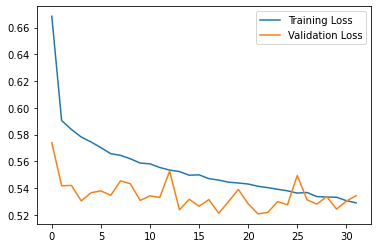

In [18]:
plt.plot(training_loss, label = 'Training Loss')
plt.plot(validation_loss, label = 'Validation Loss')
plt.legend()
plt.show()

In [19]:
torch.manual_seed(1234)

test_input = test_input.to(device)
test_target = test_target.to(device)

with torch.no_grad():
    test_loss = model_utils.validate(stgcn, loss_criterion, test_input, test_target, adj_mat, batch_size)
    print(test_loss)

0.46534478664398193


In [20]:
results = model_utils.predict(stgcn, test_input, adj_mat)

In [21]:
model_utils.save_model(stgcn,optimizer)

Model has been saved to path : ./saved_models/20210627/18_50_30


In [22]:
loaded_model, loaded_optimizer = model_utils.load_model(path=None)

Loading model in path : ./saved_models/20210627/18_50_30


In [23]:
torch.manual_seed(1234)

#Testing loaded model
loaded_model.to(device)

with torch.no_grad():
    test_loss = model_utils.validate(loaded_model, loss_criterion, test_input, test_target, adj_mat, batch_size)
    print(test_loss)

0.46534478664398193
